# Generating random floating-point

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

Based on [this unpublished paper](https://allendowney.com/research/rand/)


In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
from random import random

%timeit random()

48.2 ns ± 1.38 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [3]:
sample = [random() for i in range(10000)]
min(sample), max(sample)

(3.7156049220832266e-05, 0.9999840330500827)

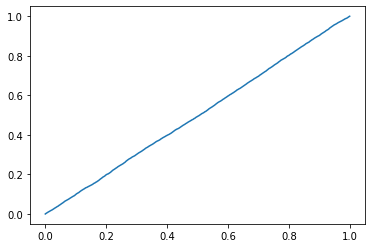

In [4]:
from empiricaldist import Cdf

Cdf.from_seq(sample).plot()

In [5]:
# Implementation by Raymond Hettinger
# https://github.com/python/cpython/pull/22664

from random import getrandbits

def full_random():
    ''' Uniform distribution from all possible floats
        in the interval 0.0 <= X < 1.0.

    '''
    # Choose a significand uniformly from:  2**52 <= mantissa < 2**53.
    # Then choose a binade from a geometric distribution where smaller
    # binade exponents occur half as often as the next larger exponent.

    mantissa = 0x10_0000_0000_0000 | getrandbits(52)
    exponent = -53
    x = 0
    while not x:
        x = getrandbits(32)
        exponent += x.bit_length() - 32
    return mantissa * 2.0 ** exponent

In [6]:
%timeit full_random()

684 ns ± 22.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
sample = [full_random() for i in range(10000)]
min(sample), max(sample)

(7.268641044149992e-05, 0.999875447578364)

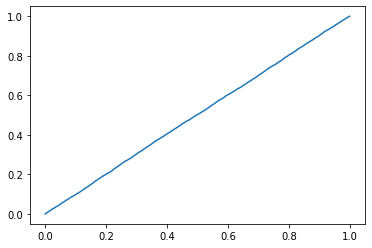

In [8]:
from empiricaldist import Cdf

Cdf.from_seq(sample).plot()

In [13]:
# Implementation by Allen Downey

from random import getrandbits

def full_random():
    ''' Uniform distribution from all possible floats
        in the interval 0.0 <= X < 1.0.

    '''
    # Trying a version closer to the implementation in the paper.
    # Turns out to be a little slower than Raymond's.
    exponent = -53
    bits = getrandbits(63)
    test = 2
    while bits % test == 0:
        exponent -= 1
        test <<= 1
        
    bits = (bits>>11) & 0x000f_ffff_ffff_ffff
    mantissa = 0x0010_0000_0000_0000 | bits
    return mantissa * 2.0 ** exponent

In [14]:
full_random()

0.7063543798947223

In [15]:
%timeit full_random()

800 ns ± 23.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [16]:
sample = [full_random() for i in range(10000)]
min(sample), max(sample)

(0.0003048555077307528, 0.9999559553670975)

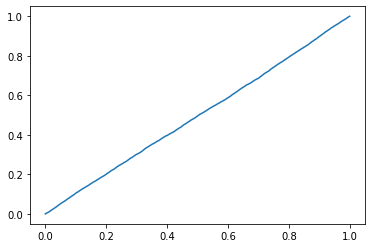

In [17]:
from empiricaldist import Cdf

Cdf.from_seq(sample).plot()